In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
co=pd.read_csv(r"C:\Users\sivar\Downloads\calories.csv")
ex=pd.read_csv(r"C:\Users\sivar\Downloads\exercise.csv")


In [3]:
co.head(5)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
ex.head().max()

User_ID       17771927
Gender            male
Age                 69
Height           190.0
Weight            94.0
Duration          29.0
Heart_Rate       105.0
Body_Temp         40.8
dtype: object

In [5]:
co.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [6]:
ex.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [7]:
co.count()

User_ID     15000
Calories    15000
dtype: int64

In [8]:
ex.count()

User_ID       15000
Gender        15000
Age           15000
Height        15000
Weight        15000
Duration      15000
Heart_Rate    15000
Body_Temp     15000
dtype: int64

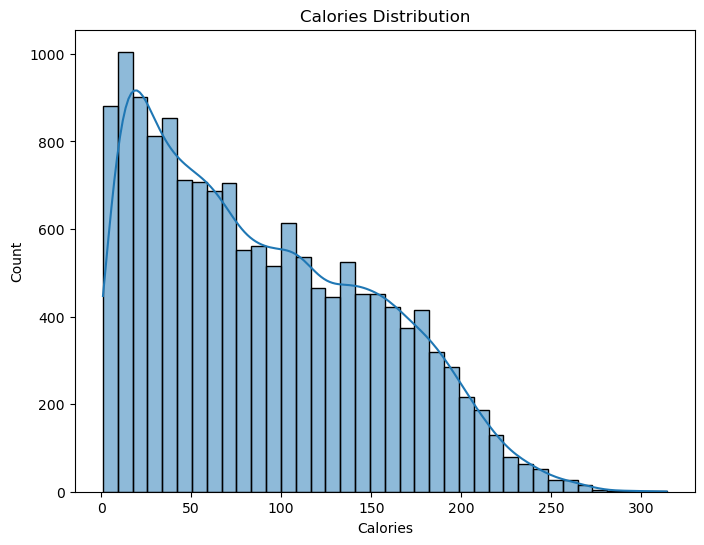

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(co["Calories"], kde=True)
plt.title("Calories Distribution")
plt.show()

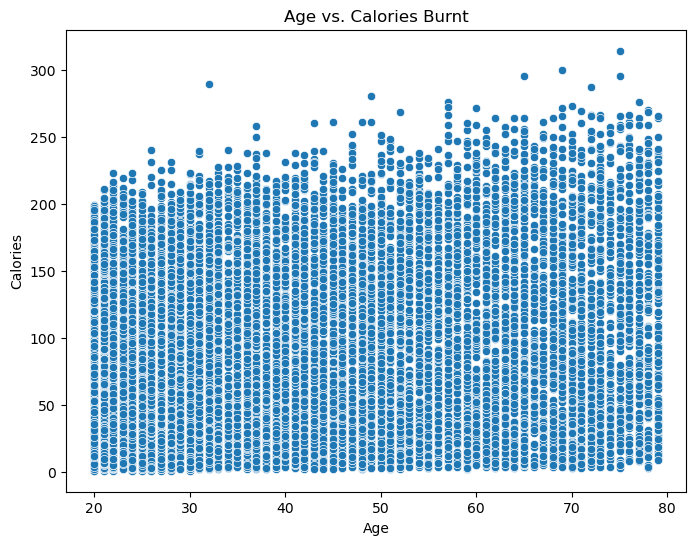

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ex["Age"], y=co["Calories"])
plt.title("Age vs. Calories Burnt")
plt.show()

In [12]:
new=pd.concat([ex,co["Calories"]],axis=1)

In [13]:
new.max()

User_ID       19999647
Gender            male
Age                 79
Height           222.0
Weight           132.0
Duration          30.0
Heart_Rate       128.0
Body_Temp         41.5
Calories         314.0
dtype: object

In [14]:
 new.replace({"Gender":{"male":0,"female":1}},inplace=True)

C:\Users\sivar\AppData\Local\Temp\ipykernel_25116\3441840453.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new.replace({"Gender":{"male":0,"female":1}},inplace=True)


In [15]:
new

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [16]:
x=new.drop(columns=new[["User_ID","Calories"]],axis=1)
y=new["Calories"]

In [17]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [18]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
lr.score(x_test,y_test)

0.9671386325291887

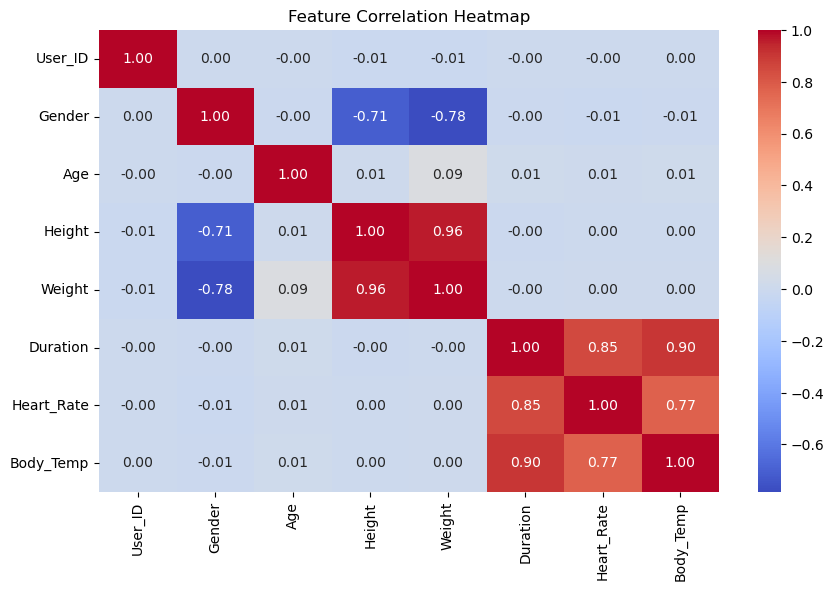

In [24]:
import seaborn as sns

# Convert categorical variables to numerical (if necessary)
df_encoded = ex.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'male': 0, 'female': 1})  # Encoding Gender

# Compute correlation on numerical columns only
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [31]:
# Ensure data is correctly split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# Initialize and train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Ensure predictions are on X_test
y_pred = rf.predict(x_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")


R-squared Score: 0.99


In [32]:
import pickle

# Save the model
with open('calories.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Load the model later
with open('calories.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)


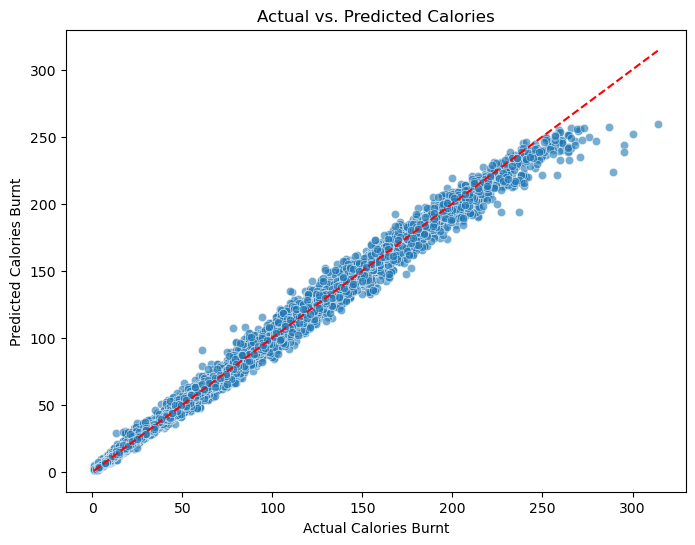

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Calories Burnt")
plt.ylabel("Predicted Calories Burnt")
plt.title("Actual vs. Predicted Calories")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Identity line
plt.show()
